# Model based collaborative system

In [1]:
# import core modules
import pandas as pd 
import numpy as np
from surprise import Reader, Dataset
from surprise import SVD
from surprise.accuracy import rmse, mae
from collections import defaultdict
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from IPython.display import display, Image

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# rating dataset
ratings = pd.read_csv ('data_movie/ratings.csv')

# movies dataset
movies = pd.read_csv('data_movie/movies.csv')

## Pre-processamento

In [3]:
dict_movies = {}
for index, row in movies.iterrows():
    dict_movies[row['movieId']] = (row['title'], row['genres'])

In [4]:
# adding corresponded data columns
new_cols = np.zeros((ratings.shape[0] , 2)).astype('object')

for index, row in ratings.iterrows():
    new_cols[index][0] = dict_movies[int(row['movieId'])][0]
    new_cols[index][1] = dict_movies[int(row['movieId'])][1]

In [5]:
# final dataframe
aux = np.append(ratings.to_numpy(),new_cols, axis=1)
movielens_dataframe = pd.DataFrame(aux, columns = ['userId', 'movieId', 'rating', 'timestamp','title', 'genres'])
movielens_dataframe.drop(['timestamp'], axis=1, inplace=True)

In [6]:
movielens_dataframe['userId'] = movielens_dataframe['userId'].astype('int32')
movielens_dataframe['movieId'] = movielens_dataframe['movieId'].astype('int64')
movielens_dataframe['rating'] = movielens_dataframe['rating'].astype('float32')

In [7]:
# number of ratings per user
counts = movielens_dataframe['userId'].value_counts()
counts_median = counts.median()
counts
counts[counts == 20]

320    20
207    20
576    20
194    20
189    20
257    20
147    20
53     20
278    20
406    20
595    20
569    20
431    20
442    20
Name: userId, dtype: int64

In [8]:
print(counts_median)

70.5


In [9]:
# matriz de ratings-users
movie_matrix = movielens_dataframe.pivot_table(index='userId', columns='title', values='rating')

## Treinamento e Teste

In [10]:
# surprise dataset
reader = Reader()
dataset = Dataset.load_from_df(movielens_dataframe[['userId', 'movieId', 'rating']], reader)

In [11]:
# train set
train_set = dataset.build_full_trainset()

In [12]:
# svd model
svd = SVD()
svd.fit(train_set)

In [13]:
# test set
test_set = train_set.build_anti_testset()

In [14]:
def get_top_n(pred, n=10):
    #Return the top-N recommendation for each user from a set of predictions.
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [15]:
# predictions
pred = svd.test(test_set)

In [16]:
top_n = get_top_n(pred, n=5)

In [17]:
#for uid, user_ratings in top_n.items():
 #   print(uid, [iid for (iid, _) in user_ratings])

In [18]:
# metrics
results = (rmse(pred),mae(pred))

RMSE: 0.4864
MAE:  0.3777


In [19]:
# ir na tabela de filmes e retornar nome do filme e gênero


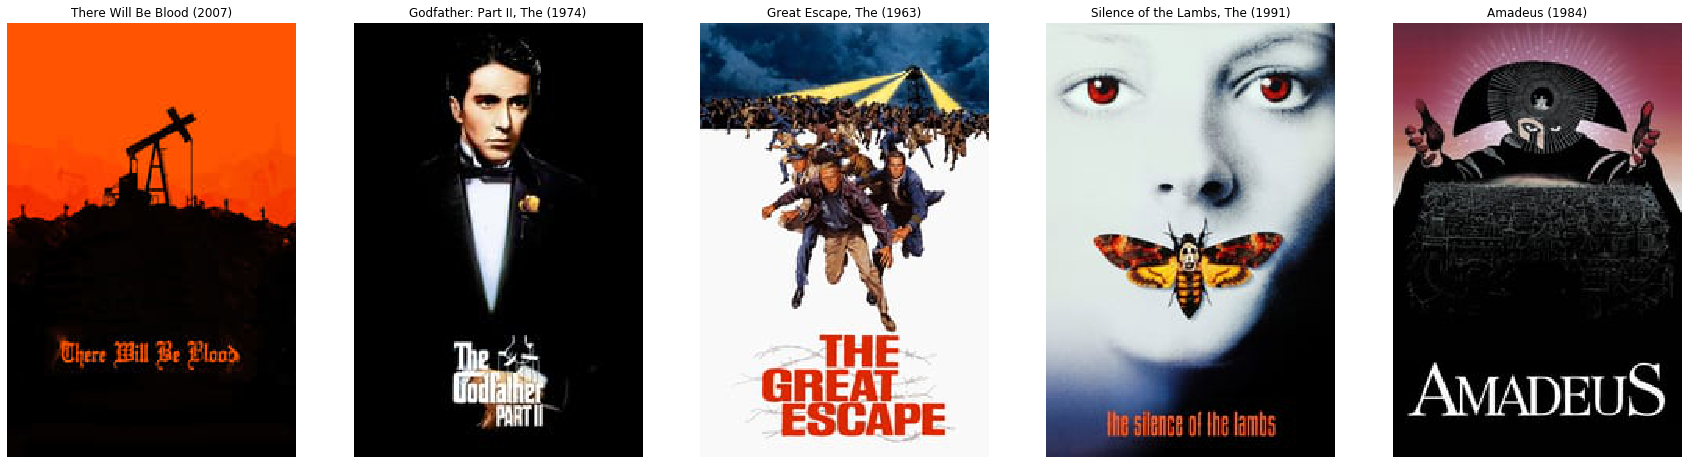

In [97]:
image=[0,0,0,0,0]
img_source=[0,0,0,0,0]
#make new figure with 2 subfigures
#each subfigure can have an image in it
fig = plt.figure(figsize=(30,65))

user = 5;

for i in range(5):
    
    k = movies[movies['movieId']==top_n[user][i][0]].index
    image[i] = plt.subplot(1,5,i+1, title = movies['title'][k].tolist()[0])
    img_source[i] = mpimg.imread('image/' + str(top_n[user][i][0])+'.jpg')
    _ = image[i].imshow(img_source[i])
    
    image[i].axis("off")

plt.show()

In [100]:
for i in range(5):
    
    k = movies[movies['movieId']==top_n[user][i][0]].index
    print(movies['genres'][k].tolist()[0])
    

Drama|Western
Crime|Drama
Action|Adventure|Drama|War
Crime|Horror|Thriller
Drama


In [ ]:
# mostrar que a base está balanceada

# em relação ao número de avaliações por filme
mv = movielens_dataframe.drop(['title','genres','userId'], axis=1)
# "id do filme" vs número de avaliações
mv = mv.groupby(['movieId']).count()
mv.head()

In [ ]:
# em relação ao número de filmes avaliados para cada nota 
rt = movielens_dataframe.drop(['title','genres','userId'], axis=1)
# notas vs número de vezes que aparece
rt = rt.groupby(['rating']).count()
rt

In [ ]:
#counts[counts['userId'] == 20]

In [ ]:
display(Image('../image/' + str(top_n[1][0][0]) + '.jpg'))

In [ ]:
# movielens_dataframe[movielens_dataframe['movieId'] == 193609]

In [ ]:
# talvez mexer nos parâmetros do SVD()

In [99]:
movielens_dataframe[(movielens_dataframe['userId']==5) & (movielens_dataframe['rating']>3.5)]

,userId,movieId,rating,title,genres
516,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
517,5,21,4.0,Get Shorty (1995),Comedy|Crime|Thriller
518,5,34,4.0,Babe (1995),Children|Drama
519,5,36,4.0,Dead Man Walking (1995),Crime|Drama
521,5,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
522,5,58,5.0,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance
523,5,110,4.0,Braveheart (1995),Action|Drama|War
526,5,232,4.0,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance
527,5,247,5.0,Heavenly Creatures (1994),Crime|Drama
529,5,261,4.0,Little Women (1994),Drama


Usuario 5:

generos dos filmes recomendados:

Drama|Western
Crime|Drama
Action|Adventure|Drama|War
Crime|Horror|Thriller
Drama


filmes com notas >= 4:

14/20 filmes de drama
7/20 Crime
5/20 thriller
3/20 crime/thriller